# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


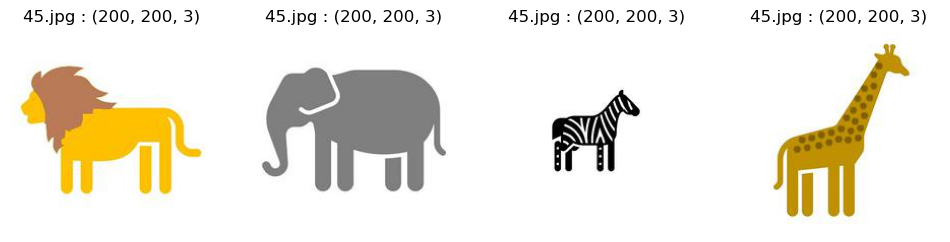

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = '/kaggle/input/flights/challenges/data/safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

> **Note**: There is no single "correct" solution. Sample solutions are provided in [05 - Safari CNN Solution (PyTorch).ipynb](05%20-%20Safari%20CNN%20Solution%20(PyTorch).ipynb) and [05 - Safari CNN Solution (TensorFlow).ipynb](05%20-%20Safari%20CNN%20Solution%20(TensorFlow).ipynb).

## Load necessary packages

In [2]:
from tensorflow.keras import Sequential , layers,callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.models import load_model

## Load data using the ImageDataGenerator class

In [3]:
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    directory = "/kaggle/input/flights/challenges/data/safari/training",
    target_size=(200, 200),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training') 
validation_generator = datagen.flow_from_directory(
    directory = "/kaggle/input/flights/challenges/data/safari/training",
    target_size=(200, 200),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation') 

Preparing training dataset...
Found 280 images belonging to 4 classes.
Found 116 images belonging to 4 classes.


## Create the neural network using a pretrained ResNet101 model

In [4]:
model = Sequential()
model.add(ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape = (200,200,3)
))
for layer in model.layers:
    layer.trainable=False
model.add( layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dense(4 , activation = "softmax"))
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

171446536/171446536 [==============================] - 7s 0us/step


## Fit the model to our data

In [5]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_generator,
    validation_data = validation_generator, 
    epochs = 100, verbose = 2, callbacks = [callback])

Epoch 1/100
9/9 - 16s - loss: 100.0504 - accuracy: 0.2679 - val_loss: 70.2603 - val_accuracy: 0.5086 - 16s/epoch - 2s/step
Epoch 2/100
9/9 - 1s - loss: 53.9069 - accuracy: 0.4179 - val_loss: 49.0889 - val_accuracy: 0.3621 - 1s/epoch - 149ms/step
Epoch 3/100
9/9 - 1s - loss: 21.2591 - accuracy: 0.5929 - val_loss: 6.7716 - val_accuracy: 0.6379 - 1s/epoch - 148ms/step
Epoch 4/100
9/9 - 1s - loss: 4.2086 - accuracy: 0.8179 - val_loss: 8.8166 - val_accuracy: 0.6379 - 1s/epoch - 148ms/step
Epoch 5/100
9/9 - 1s - loss: 2.6251 - accuracy: 0.8500 - val_loss: 0.5180 - val_accuracy: 0.9310 - 1s/epoch - 144ms/step
Epoch 6/100
9/9 - 1s - loss: 0.3796 - accuracy: 0.9571 - val_loss: 0.0737 - val_accuracy: 0.9828 - 1s/epoch - 146ms/step
Epoch 7/100
9/9 - 1s - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.1068 - val_accuracy: 0.9569 - 1s/epoch - 159ms/step
Epoch 8/100
9/9 - 1s - loss: 0.0612 - accuracy: 0.9893 - val_loss: 0.1904 - val_accuracy: 0.9483 - 1s/epoch - 147ms/step
Epoch 9/100
9/9 - 1s - loss

## Plot losses and accuracies 

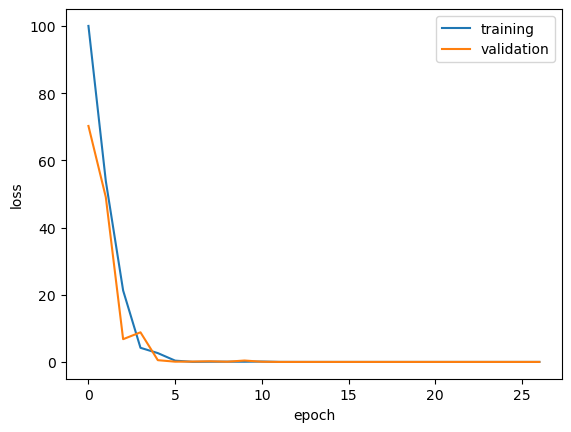

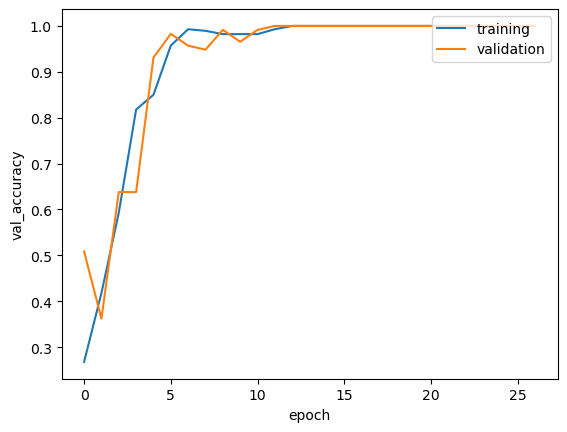

In [6]:
epoch_nums = range(0,len(history.history["loss"]))
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('val_accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Save your model

Add code below to save your model's trained weights.

In [7]:
model.save("model.h5")

## Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 [==============================] - 2s 2s/step


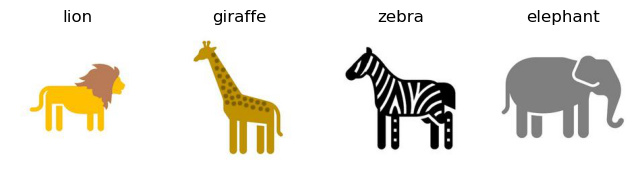

In [8]:
# Function to predict the class of an image
def predict_image(classifier, image):
    import numpy
    
    # Default value
    index = 0
    image = np.expand_dims(image , axis = 0)*(1/255)
    model= load_model(classifier) 
    pred = model.predict(image)
    index = np.argmax(np.array(pred))
    
    
    # Return the predicted index
    return index


# Load your model
model_dir = '/kaggle/working/model.h5'

# The images are in the data/shapes folder
test_data_path = '/kaggle/input/flights/challenges/data/safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model_dir, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

Hopefully, your model predicted all four of the image classes correctly!